# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [96]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample


In [97]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [98]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [99]:
fraud.shape

(1000000, 8)

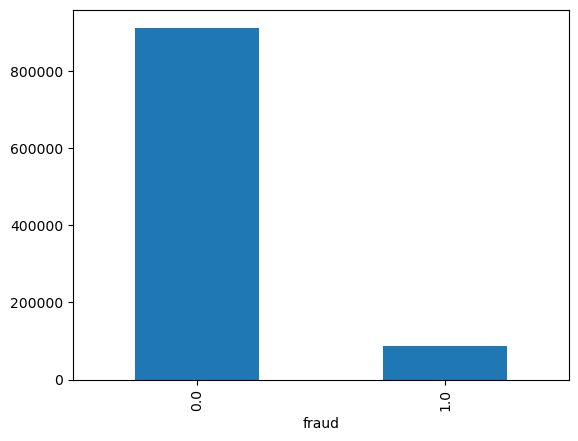

In [100]:
fraud_target = fraud["fraud"].value_counts()
fraud_target.plot(kind="bar")
plt.show()

In [101]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

X_train, X_test, y_train, y_test = train_test_split(features, target)

In [102]:
features.head(5)

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0


In [103]:
target.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: fraud, dtype: float64

In [104]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [105]:

X_train_scaled

array([[-0.37986154, -0.1726505 ,  0.55942508, ...,  1.3631098 ,
        -0.33434722,  0.73392626],
       [ 0.19277619, -0.21362028, -0.54675486, ..., -0.73361662,
        -0.33434722,  0.73392626],
       [ 1.03082265, -0.20717887, -0.56521006, ..., -0.73361662,
        -0.33434722,  0.73392626],
       ...,
       [ 0.85084471, -0.21788372, -0.03852625, ...,  1.3631098 ,
        -0.33434722,  0.73392626],
       [-0.07377922, -0.20555626, -0.59898811, ..., -0.73361662,
        -0.33434722,  0.73392626],
       [ 2.54154828, -0.0991971 , -0.44335393, ..., -0.73361662,
        -0.33434722,  0.73392626]])

In [106]:
log_reg = LogisticRegression()

In [107]:
log_reg.fit(X_train_scaled, y_train)

LogisticRegression()

In [108]:

log_reg.score(X_test_scaled, y_test)

0.958428

In [109]:

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228062
         1.0       0.89      0.60      0.72     21938

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.95    250000




Oversampling

In [111]:
train = pd.DataFrame(X_train_scaled, columns = X_train.columns)

In [112]:

train["fraud"] = y_train.values

In [113]:

fraud = train[train["fraud"] == 1]
no_fraud = train[train["fraud"] == 0]

In [114]:
fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
9,-0.405555,-0.193447,0.905337,-2.732305,-0.733617,-0.334347,0.733926,1.0
17,1.337698,-0.211878,-0.110604,0.365991,-0.733617,-0.334347,0.733926,1.0
23,1.321986,-0.219684,-0.535429,0.365991,-0.733617,-0.334347,0.733926,1.0
33,0.807186,-0.162657,1.763648,0.365991,1.363110,-0.334347,0.733926,1.0
34,-0.387640,-0.077034,3.052280,-2.732305,-0.733617,-0.334347,0.733926,1.0
...,...,...,...,...,...,...,...,...
749956,-0.343421,0.339259,0.826153,0.365991,1.363110,-0.334347,0.733926,1.0
749963,1.301756,-0.218446,-0.574729,0.365991,-0.733617,-0.334347,0.733926,1.0
749975,2.134363,0.024002,-0.290598,0.365991,-0.733617,-0.334347,0.733926,1.0
749984,0.090699,-0.121119,1.290128,0.365991,-0.733617,-0.334347,0.733926,1.0


In [115]:

no_fraud

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.379862,-0.172651,0.559425,0.365991,1.363110,-0.334347,0.733926,0.0
1,0.192776,-0.213620,-0.546755,0.365991,-0.733617,-0.334347,0.733926,0.0
2,1.030823,-0.207179,-0.565210,0.365991,-0.733617,-0.334347,0.733926,0.0
3,-0.337762,-0.030218,0.355350,0.365991,1.363110,-0.334347,-1.362535,0.0
4,-0.168668,-0.198764,-0.399531,0.365991,-0.733617,2.990903,0.733926,0.0
...,...,...,...,...,...,...,...,...
749994,-0.372608,-0.062161,1.495260,0.365991,-0.733617,-0.334347,-1.362535,0.0
749995,-0.064931,-0.067172,-0.250130,0.365991,-0.733617,-0.334347,0.733926,0.0
749996,-0.016163,-0.210308,0.034151,0.365991,-0.733617,-0.334347,-1.362535,0.0
749997,0.850845,-0.217884,-0.038526,0.365991,1.363110,-0.334347,0.733926,0.0


In [116]:

yes_diabetes_oversampled = resample(fraud, 
                                    replace=True, 
                                    n_samples = len(no_fraud),
                                    random_state=0)

In [117]:

yes_diabetes_oversampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31671,-0.140564,-0.213426,0.921180,0.365991,-0.733617,-0.334347,0.733926,1.0
500436,-0.287833,-0.214662,2.268610,0.365991,-0.733617,-0.334347,0.733926,1.0
489929,-0.387205,4.578902,-0.578716,-2.732305,1.363110,-0.334347,0.733926,1.0
600783,1.413272,-0.182824,-0.292596,0.365991,-0.733617,-0.334347,0.733926,1.0
526963,0.430345,-0.219201,2.511422,0.365991,-0.733617,-0.334347,0.733926,1.0
...,...,...,...,...,...,...,...,...
28897,-0.393266,-0.104034,1.728123,-2.732305,-0.733617,-0.334347,-1.362535,1.0
581402,13.624693,-0.146479,0.187692,0.365991,-0.733617,-0.334347,0.733926,1.0
87482,31.000537,-0.185895,2.757958,0.365991,-0.733617,-0.334347,-1.362535,1.0
162926,4.919153,-0.219767,-0.439066,0.365991,-0.733617,-0.334347,0.733926,1.0


In [118]:

train_over = pd.concat([yes_diabetes_oversampled, no_fraud])
train_over

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
31671,-0.140564,-0.213426,0.921180,0.365991,-0.733617,-0.334347,0.733926,1.0
500436,-0.287833,-0.214662,2.268610,0.365991,-0.733617,-0.334347,0.733926,1.0
489929,-0.387205,4.578902,-0.578716,-2.732305,1.363110,-0.334347,0.733926,1.0
600783,1.413272,-0.182824,-0.292596,0.365991,-0.733617,-0.334347,0.733926,1.0
526963,0.430345,-0.219201,2.511422,0.365991,-0.733617,-0.334347,0.733926,1.0
...,...,...,...,...,...,...,...,...
749994,-0.372608,-0.062161,1.495260,0.365991,-0.733617,-0.334347,-1.362535,0.0
749995,-0.064931,-0.067172,-0.250130,0.365991,-0.733617,-0.334347,0.733926,0.0
749996,-0.016163,-0.210308,0.034151,0.365991,-0.733617,-0.334347,-1.362535,0.0
749997,0.850845,-0.217884,-0.038526,0.365991,1.363110,-0.334347,0.733926,0.0


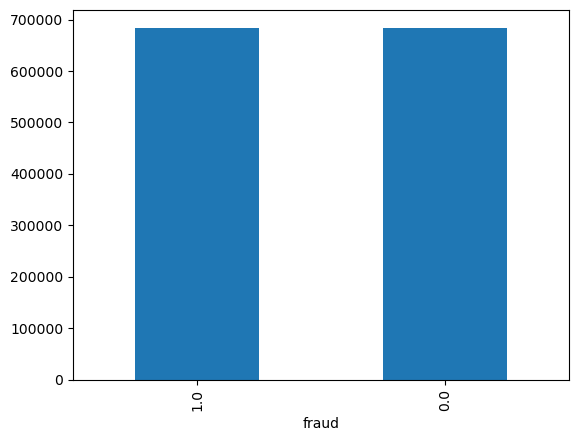

In [119]:

fraud_plt = train_over["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [120]:
X_train_over = train_over.drop(columns = ["fraud"])
y_train_over = train_over["fraud"]

In [121]:

log_reg = LogisticRegression()
log_reg.fit(X_train_over, y_train_over)

LogisticRegression()

In [122]:

pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

C:\Users\rupes\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228062
         1.0       0.58      0.95      0.72     21938

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [129]:
#Undersampling

In [130]:

train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,-0.379862,-0.172651,0.559425,0.365991,1.363110,-0.334347,0.733926,0.0
1,0.192776,-0.213620,-0.546755,0.365991,-0.733617,-0.334347,0.733926,0.0
2,1.030823,-0.207179,-0.565210,0.365991,-0.733617,-0.334347,0.733926,0.0
3,-0.337762,-0.030218,0.355350,0.365991,1.363110,-0.334347,-1.362535,0.0
4,-0.168668,-0.198764,-0.399531,0.365991,-0.733617,2.990903,0.733926,0.0
...,...,...,...,...,...,...,...,...
749995,-0.064931,-0.067172,-0.250130,0.365991,-0.733617,-0.334347,0.733926,0.0
749996,-0.016163,-0.210308,0.034151,0.365991,-0.733617,-0.334347,-1.362535,0.0
749997,0.850845,-0.217884,-0.038526,0.365991,1.363110,-0.334347,0.733926,0.0
749998,-0.073779,-0.205556,-0.598988,0.365991,-0.733617,-0.334347,0.733926,0.0


In [132]:

no_diabetes_undersampled = resample(no_fraud, 
                                    replace=False, 
                                    n_samples = len(fraud),
                                    random_state=0)
no_diabetes_undersampled

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
107754,0.926245,-0.215383,0.253014,0.365991,-0.733617,2.990903,0.733926,0.0
702218,-0.388267,4.412528,-0.544577,-2.732305,1.363110,-0.334347,-1.362535,0.0
33179,-0.392795,-0.088221,-0.458139,-2.732305,-0.733617,-0.334347,-1.362535,0.0
73943,-0.280765,-0.114276,-0.486567,0.365991,-0.733617,-0.334347,0.733926,0.0
297213,-0.340930,-0.157059,0.528038,0.365991,-0.733617,-0.334347,0.733926,0.0
...,...,...,...,...,...,...,...,...
133707,-0.321438,-0.121884,-0.421345,0.365991,-0.733617,-0.334347,0.733926,0.0
358519,-0.294428,-0.131811,-0.569285,0.365991,-0.733617,-0.334347,0.733926,0.0
59791,-0.325095,-0.219741,-0.186134,0.365991,-0.733617,-0.334347,0.733926,0.0
665975,-0.157516,-0.213898,-0.531564,0.365991,-0.733617,-0.334347,-1.362535,0.0


In [133]:
train_under = pd.concat([no_diabetes_undersampled, fraud])
train_under

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
107754,0.926245,-0.215383,0.253014,0.365991,-0.733617,2.990903,0.733926,0.0
702218,-0.388267,4.412528,-0.544577,-2.732305,1.363110,-0.334347,-1.362535,0.0
33179,-0.392795,-0.088221,-0.458139,-2.732305,-0.733617,-0.334347,-1.362535,0.0
73943,-0.280765,-0.114276,-0.486567,0.365991,-0.733617,-0.334347,0.733926,0.0
297213,-0.340930,-0.157059,0.528038,0.365991,-0.733617,-0.334347,0.733926,0.0
...,...,...,...,...,...,...,...,...
749956,-0.343421,0.339259,0.826153,0.365991,1.363110,-0.334347,0.733926,1.0
749963,1.301756,-0.218446,-0.574729,0.365991,-0.733617,-0.334347,0.733926,1.0
749975,2.134363,0.024002,-0.290598,0.365991,-0.733617,-0.334347,0.733926,1.0
749984,0.090699,-0.121119,1.290128,0.365991,-0.733617,-0.334347,0.733926,1.0


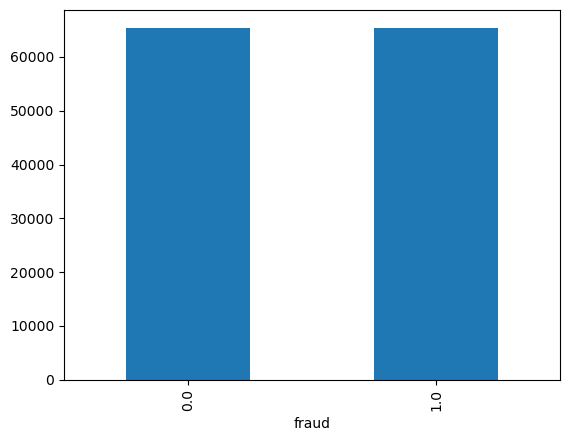

In [134]:
fraud_plt = train_under["fraud"].value_counts()
fraud_plt.plot(kind="bar")
plt.show()

In [135]:
X_train_under = train_under.drop(columns = ["fraud"])
y_train_under = train_under["fraud"]

In [136]:

log_reg = LogisticRegression()
log_reg.fit(X_train_under, y_train_under)

LogisticRegression()

In [137]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

C:\Users\rupes\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228062
         1.0       0.58      0.95      0.72     21938

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000



In [123]:
#
#SMOTE

In [124]:
from imblearn.over_sampling import SMOTE

In [125]:
sm = SMOTE(random_state = 1,sampling_strategy=1.0)

In [126]:
X_train_sm,y_train_sm = sm.fit_resample(X_train_scaled,y_train)

In [127]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000)

In [128]:
pred = log_reg.predict(X_test_scaled)
print(classification_report(y_pred = pred, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    228062
         1.0       0.58      0.95      0.72     21938

    accuracy                           0.93    250000
   macro avg       0.79      0.94      0.84    250000
weighted avg       0.96      0.93      0.94    250000

